## Multi-channel ℓ1-TV denoising (salt-and-pepper noise)

This notebook demonstrates the use of SPORCO to solve an ℓ1-TV denoising
problem for colour images

$$\mathrm{argmin}_\mathbf{x} \;
  \sum_c \| \mathbf{x}_c - \mathbf{s}_c \|_1 +
   \lambda \left\|  \sqrt{ \sum_c \left((G_0 \mathbf{x}_c)^2 +
   (G_1 \mathbf{x}_c)^2\right)} \right\|_1$$
   
where $G_0$ and $G_1$ are gradient operators along image columns and rows
respectively.



Import modules and configure matplotlib output to notebook.

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import numpy as np

from sporco import util
from sporco import plot
from sporco.admm import tvl1

%matplotlib inline

Load reference image and construct noisy test

In [2]:
# Load reference image
try:
    img = util.ExampleImages().image('standard', 'monarch.png', scaled=True)
except:
    import scipy.misc
    url = 'http://homepages.cae.wisc.edu/~ece533/images/monarch.png'
    img = scipy.misc.imread(util.netgetdata(url)).astype(np.float32)/255.0
img = img[:,160:672]


# Construct test image
np.random.seed(12345)
imgn = util.spnoise(img, 0.2)

Set TVL1Denoise solver class options.

In [3]:
# Set up TVL1Denoise options
lmbda = 8e-1
opt = tvl1.TVL1Denoise.Options({'Verbose' : True, 'MaxMainIter' : 200,
                                'RelStopTol' : 5e-3, 'gEvalY' : False})

Initialise and run ℓ1-TV solver

In [4]:
# Initialise and run TVL1Denoise object
b = tvl1.TVL1Denoise(imgn, lmbda, opt, caxis=2)
imgr = b.solve()
print("TVL1Denoise solve time: %.2fs" % b.runtime)

Itn   Fnc       DFid      RegTV     r         s         
------------------------------------------------------
   0  1.39e+05  8.07e+04  7.26e+04  3.12e-01  1.18e+00
   1  1.25e+05  8.21e+04  5.40e+04  2.28e-01  6.86e-01
   2  1.15e+05  8.19e+04  4.18e+04  1.43e-01  4.47e-01
   3  1.15e+05  9.11e+04  3.05e+04  1.21e-01  3.23e-01
   4  1.18e+05  9.49e+04  2.88e+04  1.01e-01  2.48e-01
   5  1.07e+05  8.80e+04  2.34e+04  7.13e-02  2.05e-01
   6  9.98e+04  8.31e+04  2.10e+04  5.01e-02  1.58e-01
   7  9.91e+04  8.39e+04  1.91e+04  4.27e-02  1.10e-01
   8  9.85e+04  8.37e+04  1.85e+04  3.87e-02  7.89e-02
   9  9.62e+04  8.20e+04  1.78e+04  3.02e-02  7.12e-02
  10  9.40e+04  7.99e+04  1.76e+04  2.22e-02  6.31e-02
  11  9.42e+04  8.00e+04  1.77e+04  2.01e-02  4.72e-02
  12  9.46e+04  8.03e+04  1.78e+04  1.98e-02  3.37e-02
  13  9.37e+04  7.95e+04  1.78e+04  1.72e-02  3.13e-02
  14  9.26e+04  7.85e+04  1.76e+04  1.40e-02  3.05e-02
  15  9.23e+04  7.83e+04  1.75e+04  1.27e-02  2.48e-02
  16  9.

Display test images

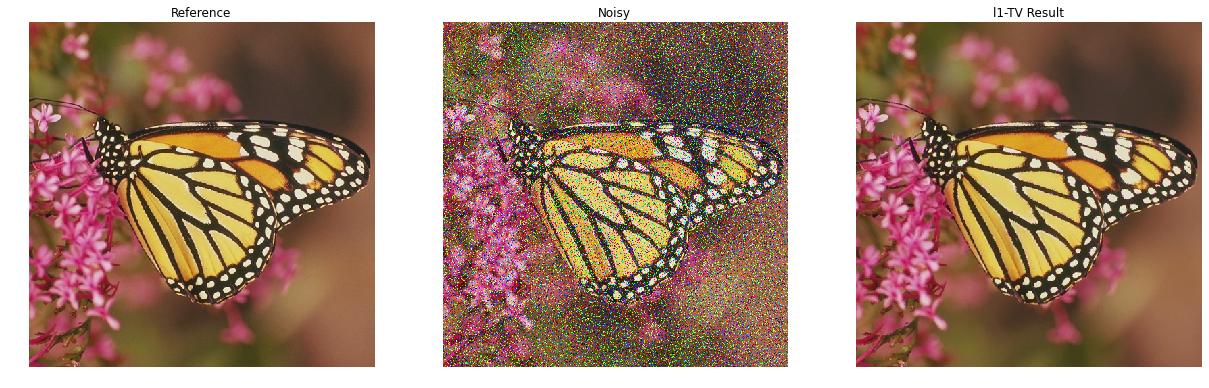

In [5]:
# Display test images
fig = plot.figure(figsize=(21,7))
plot.subplot(1,3,1)
plot.imview(img, fgrf=fig, title='Reference')
plot.subplot(1,3,2)
fgax = plot.imview(imgn, fgrf=fig, title='Noisy')
plot.subplot(1,3,3)
fxax = plot.imview(imgr, fgrf=fig, title='l1-TV Result')

Plot functional evolution during ADMM iterations.

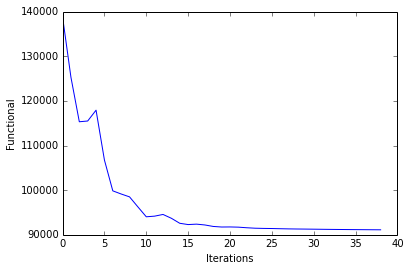

In [6]:
its = b.getitstat()
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional')
plot.close()

Plot evolution of ADMM residuals and ADMM penalty parameter.

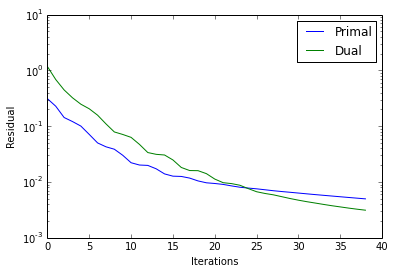

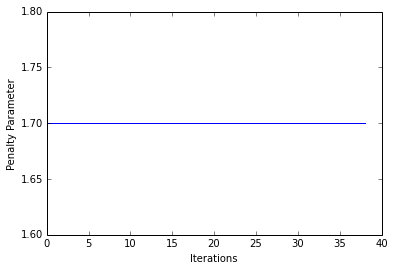

In [8]:
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual']);
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter')
plot.close()
